# Exploratory Data Analysis (EDA) and Preprocessing
## Dataset: Prosper Loan Data

This notebook presents the initial phase of the Credit Risk Audit project.  
We perform an exploratory analysis and data preprocessing with the following goals:

- **Objective**: Prepare the data for building credit default prediction models and subsequent auditing.
- **Target variable**: We will focus on predicting the loan status, identifying defaults or delinquency risk.
- **Planned models**: Logistic Regression, Random Forest, and Gradient Boosting (XGBoost).
- **Downstream auditing**: Once the models are trained, we will audit their behavior using explainability (SHAP, LIME) and robustness techniques (adversarial perturbations).

The exploratory analysis aims to:

- Understand the structure and quality of the data.
- Handle missing values systematically.
- Detect and evaluate outliers.
- Identify variables that are not useful or could cause information leakage (e.g., post-loan variables).
- Prepare a clean and reliable dataset for modeling.

---

The dataset consists of 113,937 loans and 81 variables, including borrower characteristics, loan information, credit attributes, and historical payment performance.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
## 1. Imports and Setup
import sys
import os

# Add the project root to the Python path
sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np
from audit_tool import preprocessing as pp

# Settings
pd.set_option('display.max_columns', None)

In [3]:
## Load the preprocessed Prosper Loan dataset

file_path = '../data/raw/prosper_loan_data.csv'

df = pp.load_data(file_path)

print(f"Dataset loaded successfully with shape: {df.shape}")

Dataset loaded successfully with shape: (113937, 81)


## 1. Dataset Overview

Let's review the structure and basic statistics of the dataset.

### Dataset Dictionary
| Variable | Description |
|:---|:---|
| ListingKey | Unique key for each listing. |
| ListingNumber | Public unique number identifying the listing. |
| ListingCreationDate | Date when the listing was created. |
| CreditGrade | Credit rating at listing (pre-2009 listings). |
| Term | Length of the loan in months. |
| LoanStatus | Current status of the loan. |
| ClosedDate | Date the loan was closed (if applicable). |
| BorrowerAPR | Borrower's Annual Percentage Rate. |
| BorrowerRate | Borrower's interest rate. |
| LenderYield | Lender's yield on the loan after service fee. |
| EstimatedEffectiveYield | Effective yield estimation (after late fees and defaults). |
| EstimatedLoss | Estimated principal loss on defaults. |
| EstimatedReturn | Estimated return (Effective Yield - Loss Rate). |
| ProsperRating (numeric) | Numeric Prosper Rating at origination. |
| ProsperRating (Alpha) | Alphabetic Prosper Rating at origination. |
| ProsperScore | Custom risk score (1-10) based on Prosper data. |
| ListingCategory | Purpose selected for the loan. |
| BorrowerState | Borrower's state abbreviation. |
| Occupation | Borrower's stated occupation. |
| EmploymentStatus | Borrower's employment status. |
| EmploymentStatusDuration | Length of current employment status (months). |
| IsBorrowerHomeowner | Whether the borrower owns a home. |
| CurrentlyInGroup | Whether the borrower was in a group. |
| GroupKey | Key of the group borrower belongs to (if any). |
| DateCreditPulled | Date when the credit report was pulled. |
| CreditScoreRangeLower | Lower bound of borrower's credit score. |
| CreditScoreRangeUpper | Upper bound of borrower's credit score. |
| FirstRecordedCreditLine | Date of first recorded credit line. |
| CurrentCreditLines | Number of active credit lines. |
| OpenCreditLines | Number of open credit lines. |
| TotalCreditLinespast7years | Total credit lines opened in the last 7 years. |
| OpenRevolvingAccounts | Number of open revolving accounts. |
| OpenRevolvingMonthlyPayment | Monthly payment for revolving accounts. |
| InquiriesLast6Months | Number of credit inquiries in the last 6 months. |
| TotalInquiries | Total number of inquiries. |
| CurrentDelinquencies | Current number of delinquent accounts. |
| AmountDelinquent | Total dollars delinquent. |
| DelinquenciesLast7Years | Number of delinquencies over the last 7 years. |
| PublicRecordsLast10Years | Number of public records in the last 10 years. |
| PublicRecordsLast12Months | Number of public records in the last 12 months. |
| RevolvingCreditBalance | Total balance on revolving credit accounts. |
| BankcardUtilization | Utilization percentage of bankcard credit. |
| AvailableBankcardCredit | Available credit on bankcards. |
| TotalTrades | Total number of trade lines opened. |
| TradesNeverDelinquent | Number of trades with no delinquencies. |
| TradesOpenedLast6Months | Number of trades opened in the last 6 months. |
| DebtToIncomeRatio | Debt-to-income ratio (capped at 10.01). |
| IncomeRange | Income range category. |
| IncomeVerifiable | Whether borrower can verify income. |
| StatedMonthlyIncome | Monthly income stated by the borrower. |
| LoanKey | Unique key associated with the loan. |
| TotalProsperLoans | Number of Prosper loans the borrower has. |
| TotalProsperPaymentsBilled | Number of payments billed on Prosper loans. |
| OnTimeProsperPayments | Number of on-time payments on Prosper loans. |
| ProsperPaymentsLessThanOneMonthLate | Payments less than one month late. |
| ProsperPaymentsOneMonthPlusLate | Payments more than one month late. |
| ProsperPrincipalBorrowed | Principal amount borrowed on Prosper loans. |
| ProsperPrincipalOutstanding | Principal amount outstanding on Prosper loans. |
| ScorexChangeAtTimeOfListing | Change in credit score compared to prior Prosper loan. |
| LoanCurrentDaysDelinquent | Number of days loan is delinquent. |
| LoanFirstDefaultedCycleNumber | Loan cycle at which default occurred. |
| LoanMonthsSinceOrigination | Months since loan origination. |
| LoanNumber | Unique loan ID. |
| LoanOriginalAmount | Amount originally borrowed. |
| LoanOriginationDate | Date the loan was originated. |
| LoanOriginationQuarter | Quarter of loan origination. |
| MemberKey | Unique borrower key. |
| MonthlyLoanPayment | Scheduled monthly payment amount. |
| LP_CustomerPayments | Cumulative gross payments pre-charge-off. |
| LP_CustomerPrincipalPayments | Cumulative principal payments pre-charge-off. |
| LP_InterestandFees | Cumulative interest and fees paid pre-charge-off. |
| LP_ServiceFees | Service fees paid by investors. |
| LP_CollectionFees | Collection fees paid by investors. |
| LP_GrossPrincipalLoss | Gross principal charged-off amount. |
| LP_NetPrincipalLoss | Net uncollected principal after recoveries. |
| LP_NonPrincipalRecoverypayments | Recovery payments for fees and interest. |
| PercentFunded | Percentage of loan funded. |
| Recommendations | Number of borrower recommendations. |
| InvestmentFromFriendsCount | Number of friends who invested. |
| InvestmentFromFriendsAmount | Amount invested by friends. |
| Investors | Number of investors who funded the loan. |

In [4]:
## Quick overview: structure, types, basic statistics
pp.overview_data(df)


Data Overview
----------------------------------------
Shape: (113937, 81)

Dataset Info:
----------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

### Removal of Post-Loan Variables

In this analysis, we aim to predict credit default based solely on information available at the time of loan application. Therefore, it is crucial to remove features that reflect post-loan performance, as they would leak future information into the model.

Specifically, we remove all variables starting with **LP_**, which relate to payments, losses, fees, and recovery actions after the loan has been issued:

- `LP_CustomerPayments`
- `LP_CustomerPrincipalPayments`
- `LP_InterestandFees`
- `LP_ServiceFees`
- `LP_CollectionFees`
- `LP_GrossPrincipalLoss`
- `LP_NetPrincipalLoss`
- `LP_NonPrincipalRecoverypayments`

Keeping these features would result in unrealistic predictive performance and data leakage, making the model unviable for real-world applications.

In [5]:
# Drop post-loan variables (starting with 'LP_') to prevent data leakage

lp_columns = [col for col in df.columns if col.startswith('LP_')]

print(f"Dropping the following LP-related columns ({len(lp_columns)} total):")
print(lp_columns)

# Drop them from the dataset
df.drop(columns=lp_columns, inplace=True)

Dropping the following LP-related columns (8 total):
['LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments']


Other variables that are only available after loan performance is known:

- `LoanCurrentDaysDelinquent`: Measures the number of days a loan is currently delinquent.
- `LoanFirstDefaultedCycleNumber`: Indicates when a loan first defaulted, available only after default occurs.
- `ClosedDate`: The date the loan was closed (due to repayment, default, or cancellation).
- `Recommendations`: Number of peer recommendations. Subjective and unlikely to add meaningful predictive power.
- `InvestmentFromFriendsCount` & `InvestmentFromFriendsAmount`: Reflect social investment involvement, which is not considered relevant for the credit risk prediction objective.

These variables could artificially improve model performance if included, as they contain direct information about the loan's outcome, they should also be removed.


In [6]:
# Drop additional post-outcome variables to avoid leakage
post_loan_vars = [
    'LoanCurrentDaysDelinquent',
    'LoanFirstDefaultedCycleNumber',
    'ClosedDate',
    'Recommendations',     
    'InvestmentFromFriendsCount', 
    'InvestmentFromFriendsAmount'
]

print(f"Dropping post-outcome columns ({len(post_loan_vars)} total): {post_loan_vars}")

# Drop them
df.drop(columns=post_loan_vars, inplace=True)

Dropping post-outcome columns (6 total): ['LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'ClosedDate', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount']


In [7]:
# Variables that represent ID 
id_vars = ['ListingKey', 'LoanKey', 'MemberKey']
df.drop(columns=id_vars, inplace=True)

## 2. Missing Value Analysis

We analyze missing values to decide whether to impute or drop columns based on the percentage of missingness.

In [8]:
## Analyze missing values (show columns with missing data)

missing_values = pp.check_missing_values(df)

print("\nMissing Values Overview:")
display(missing_values)


Missing Values Overview:


,Missing Values,Percentage
GroupKey,100596,88.290898
ScorexChangeAtTimeOfListing,95009,83.387311
ProsperPrincipalOutstanding,91852,80.616481
ProsperPrincipalBorrowed,91852,80.616481
ProsperPaymentsOneMonthPlusLate,91852,80.616481
ProsperPaymentsLessThanOneMonthLate,91852,80.616481
OnTimeProsperPayments,91852,80.616481
TotalProsperPaymentsBilled,91852,80.616481
TotalProsperLoans,91852,80.616481
CreditGrade,84984,74.588588


There are many columns that contain missing values, let's focus on the percentage of missings per column.

In [9]:
# See only columns with >50% missing
high_missing = pp.check_missing_values(df, threshold=50)
display(high_missing)

,Missing Values,Percentage
GroupKey,100596,88.290898
ScorexChangeAtTimeOfListing,95009,83.387311
ProsperPrincipalOutstanding,91852,80.616481
ProsperPrincipalBorrowed,91852,80.616481
ProsperPaymentsOneMonthPlusLate,91852,80.616481
ProsperPaymentsLessThanOneMonthLate,91852,80.616481
OnTimeProsperPayments,91852,80.616481
TotalProsperPaymentsBilled,91852,80.616481
TotalProsperLoans,91852,80.616481
CreditGrade,84984,74.588588


### Column removal based on missing values and data leakage

We will automatically drop columns with more than 50% missing values to ensure model robustness. 
Some of these variables also leak future information (such as loan closure dates or default cycles).

In [10]:
# Identify columns with more than 50% missing values
high_missing_cols = high_missing[high_missing['Percentage'] > 50].index.tolist()

print(f"Dropping {len(high_missing_cols)} columns with high missingness (>50%).")
print("Columns being dropped:", high_missing_cols)

# Drop those columns
df.drop(columns=high_missing_cols, inplace=True)

Dropping 10 columns with high missingness (>50%).
Columns being dropped: ['GroupKey', 'ScorexChangeAtTimeOfListing', 'ProsperPrincipalOutstanding', 'ProsperPrincipalBorrowed', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPaymentsLessThanOneMonthLate', 'OnTimeProsperPayments', 'TotalProsperPaymentsBilled', 'TotalProsperLoans', 'CreditGrade']


In [11]:
# Check remaining missing values
remaining_missing = pp.check_missing_values(df, threshold=0)
display(remaining_missing)

,Missing Values,Percentage
EstimatedLoss,29084,25.526387
EstimatedReturn,29084,25.526387
ProsperRating (numeric),29084,25.526387
ProsperRating (Alpha),29084,25.526387
ProsperScore,29084,25.526387
EstimatedEffectiveYield,29084,25.526387
DebtToIncomeRatio,8554,7.507658
EmploymentStatusDuration,7625,6.692295
AmountDelinquent,7622,6.689662
CurrentCreditLines,7604,6.673864


### Handling remaining missing values

After removing columns with more than 50% missingness, several features still have missing values, mostly between 5% and 25%.  
We will decide how to handle them based on the type of feature:
- For numerical variables: we will impute missing values with the median.
- For categorical variables: we will impute missing values with a new category ("Missing").

In [12]:
num_cols, cat_cols = pp.get_numerical_and_categorical_columns(df)

# Impute missing values (median for numerical, 'Missing' for categorical)
df = pp.impute_missing_values(df, num_method='median', cat_method='constant',cat_fill='Missing')

# Confirm no missing values left
missing_after = pp.check_missing_values(df)
display(missing_after)

if missing_after.empty:
    print("All missing values successfully handled!")
else:
    print("Warning: Some missing values remain.")

,Missing Values,Percentage


All missing values successfully handled!


## 3. Outlier Analysis

### Outlier Detection and Treatment

Outliers can heavily influence model performance and audit results.  
We will:
- Detect potential outliers using the Interquartile Range (IQR) method.
- Treat outliers by capping extreme values to the IQR bounds, preserving dataset size.

In [13]:
# Detect outliers
outlier_percentages = pp.calculate_outlier_percentage(df)
display(pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage']))

,Outlier Percentage
PublicRecordsLast10Years,24.080852
Term,22.959179
CurrentDelinquencies,20.623678
DelinquenciesLast7Years,16.344998
ListingCategory (numeric),16.078184
AmountDelinquent,14.479054
AvailableBankcardCredit,10.049413
RevolvingCreditBalance,9.131362
CreditScoreRangeLower,6.894161
CreditScoreRangeUpper,6.894161


In [14]:
# Treat most affected columns
top_outlier_cols = list(outlier_percentages.keys())[:12]
top_outlier_cols


['PublicRecordsLast10Years',
 'Term',
 'CurrentDelinquencies',
 'DelinquenciesLast7Years',
 'ListingCategory (numeric)',
 'AmountDelinquent',
 'AvailableBankcardCredit',
 'RevolvingCreditBalance',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'TradesOpenedLast6Months',
 'TotalInquiries']

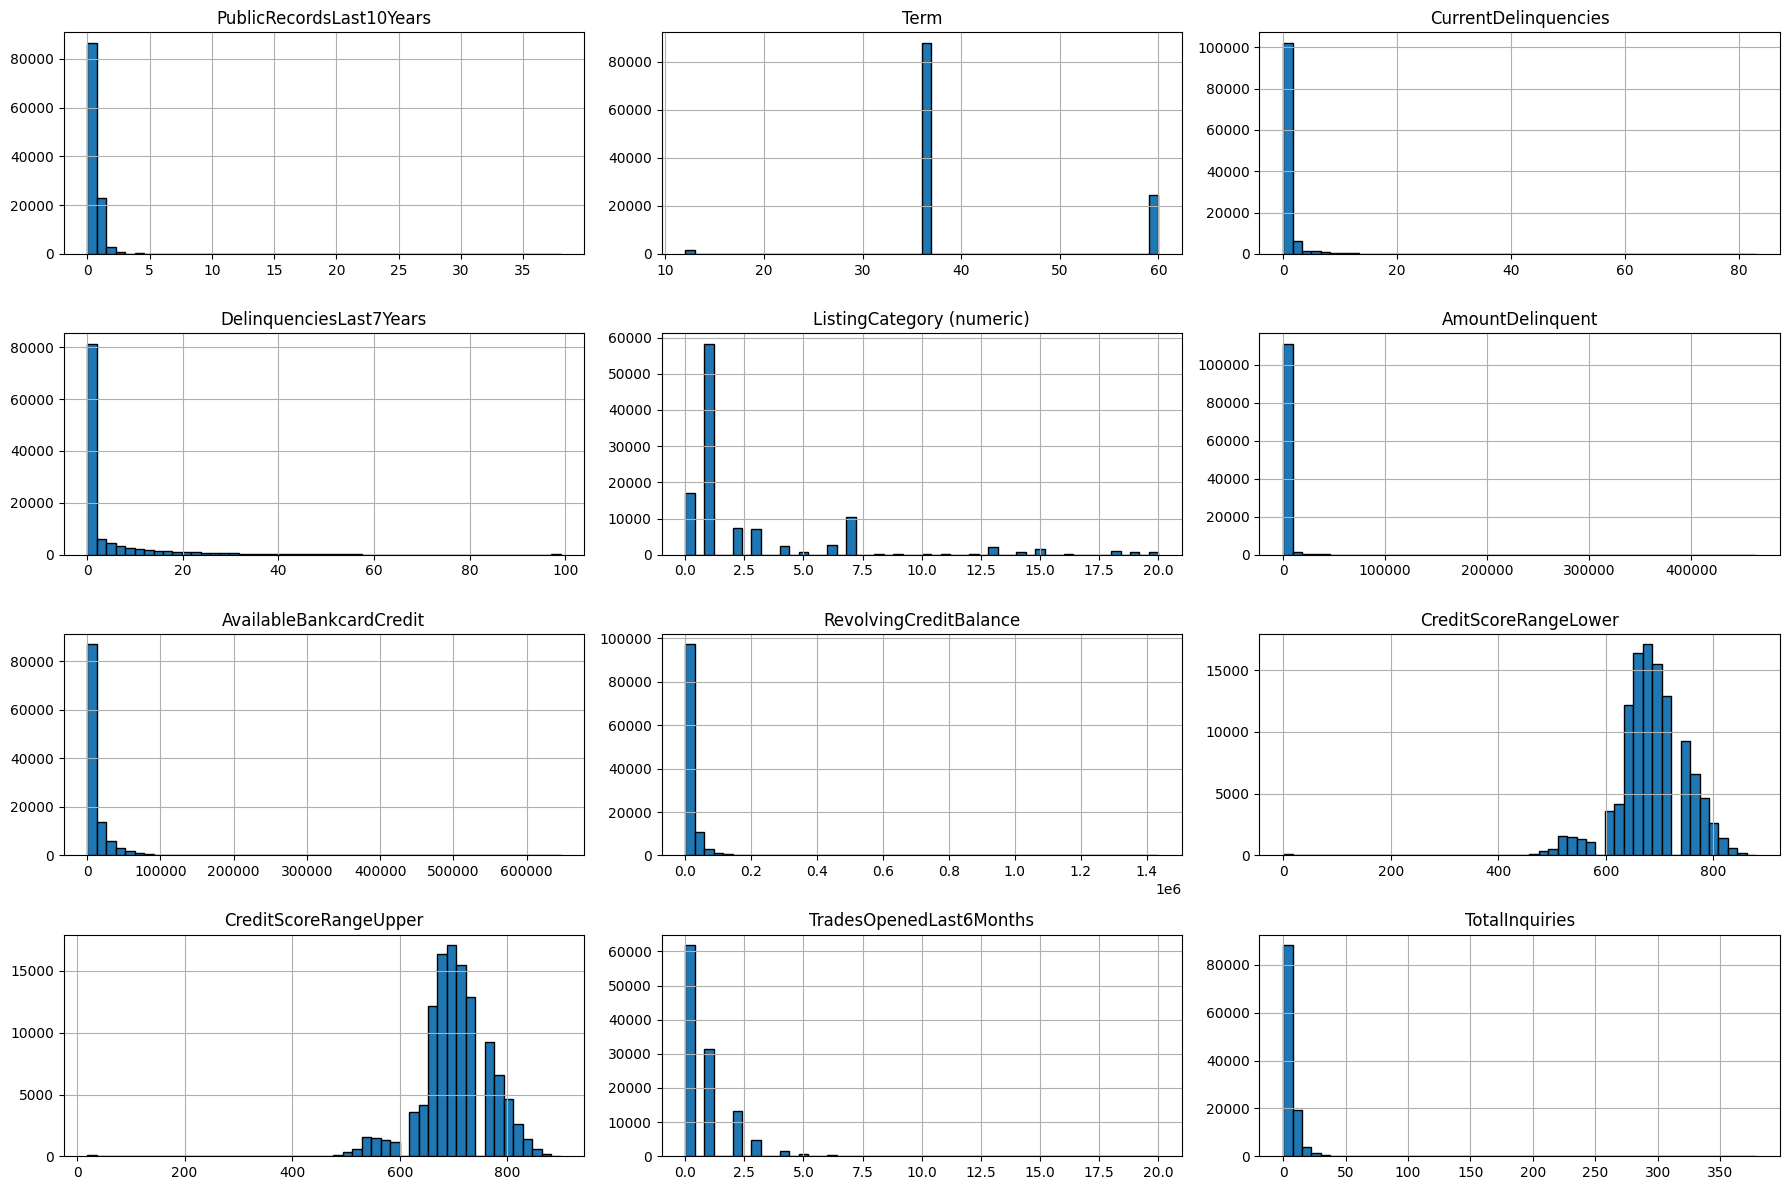

In [15]:
pp.plot_multiple_distributions(df, top_outlier_cols, bins=50, n_cols=3, figsize=(18, 12))

### Outlier Treatment

After reviewing the three variables with the highest percentage of outliers, the following decisions were made based on their business meaning and statistical behavior:

| Variable | Description | Decision |
|----------|-------------|----------|
| `PublicRecordsLast10Years` | Number of negative public records (e.g., bankruptcies, judgments) in the last 10 years. | Keep the variable. Apply winsorization at the 99th percentile to cap extreme values that may distort the model but retain meaningful variability. |
| `Term` | Loan term in months. | No outlier treatment. The variable is inherently categorical (typically 36 or 60 months) and should be treated as such in future modeling steps. |
| `CurrentDelinquencies` | Number of accounts currently delinquent. | Apply winsorization at the 99.5th percentile or set a logical cap (e.g., 20-25) to reduce the influence of extreme values. |

This approach aims to balance retaining important variation in the data while reducing the influence of extreme outliers that could negatively impact model training.


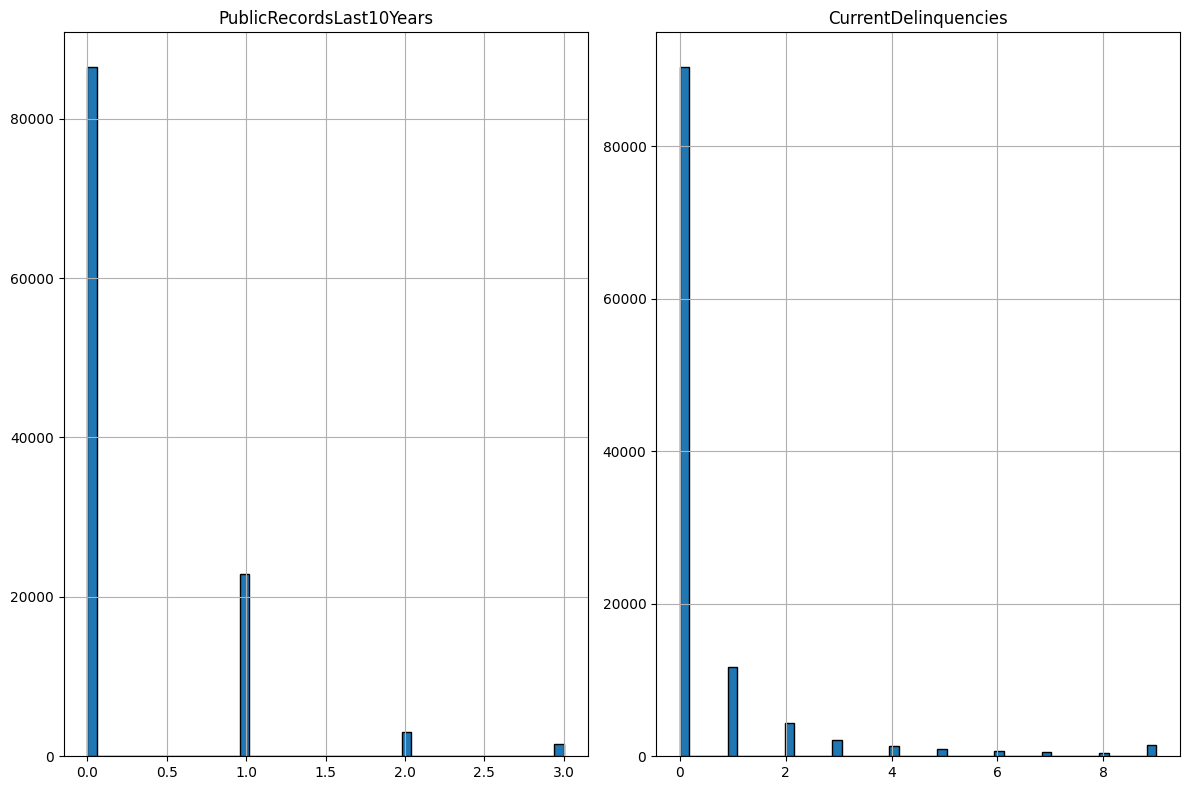

In [16]:
# Define columns and quantiles for winsorization
winsorization_plan = {
    "PublicRecordsLast10Years": (0.0, 0.99),
    "CurrentDelinquencies": (0.0, 0.995)  # Or set a logical cap
}

# Apply winsorization
df = pp.winsorize_columns(df, winsorization_plan)

# Check updated distributions
pp.plot_multiple_distributions(df, list(winsorization_plan.keys()), bins=50, n_cols=2, figsize=(12, 8))

After winsorization, the distributions of the treated variables show a significant reduction in extreme values while maintaining most of the data variability.

After analyzing the other variables with the highest number of outliers, we decided to apply winsorization to the following features:

- **DelinquenciesLast7Years**
- **AmountDelinquent**
- **AvailableBankcardCredit**
- **RevolvingCreditBalance**

These variables exhibited extreme values that could disproportionately influence the model training. Winsorization was applied at the 99th percentile, capping extreme values while preserving the general distribution of the data.

Categorical variables (e.g., ListingCategory) and features with reasonable distributions (e.g., CreditScoreRangeLower) were excluded from this treatment.

In [17]:
# Columns selected for winsorization
winsor_cols = ['DelinquenciesLast7Years',
               'AmountDelinquent',
               'AvailableBankcardCredit',
               'RevolvingCreditBalance']

# Apply winsorization (keeping top 1% capped)
df = pp.winsorize_columns(df, winsor_cols, limits=(0, 0.01))

# Check again the outliers if needed
outlier_percentages_post = pp.calculate_outlier_percentage(df)
display(pd.DataFrame.from_dict(outlier_percentages_post, orient='index', columns=['Outlier Percentage']))

/home/celia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/celia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/celia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/celia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/celia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/celia/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignor

,Outlier Percentage
PublicRecordsLast10Years,24.080852
Term,22.959179
CurrentDelinquencies,20.623678
DelinquenciesLast7Years,16.344998
ListingCategory (numeric),16.078184
AmountDelinquent,14.479054
AvailableBankcardCredit,10.049413
RevolvingCreditBalance,9.131362
CreditScoreRangeLower,6.894161
CreditScoreRangeUpper,6.894161


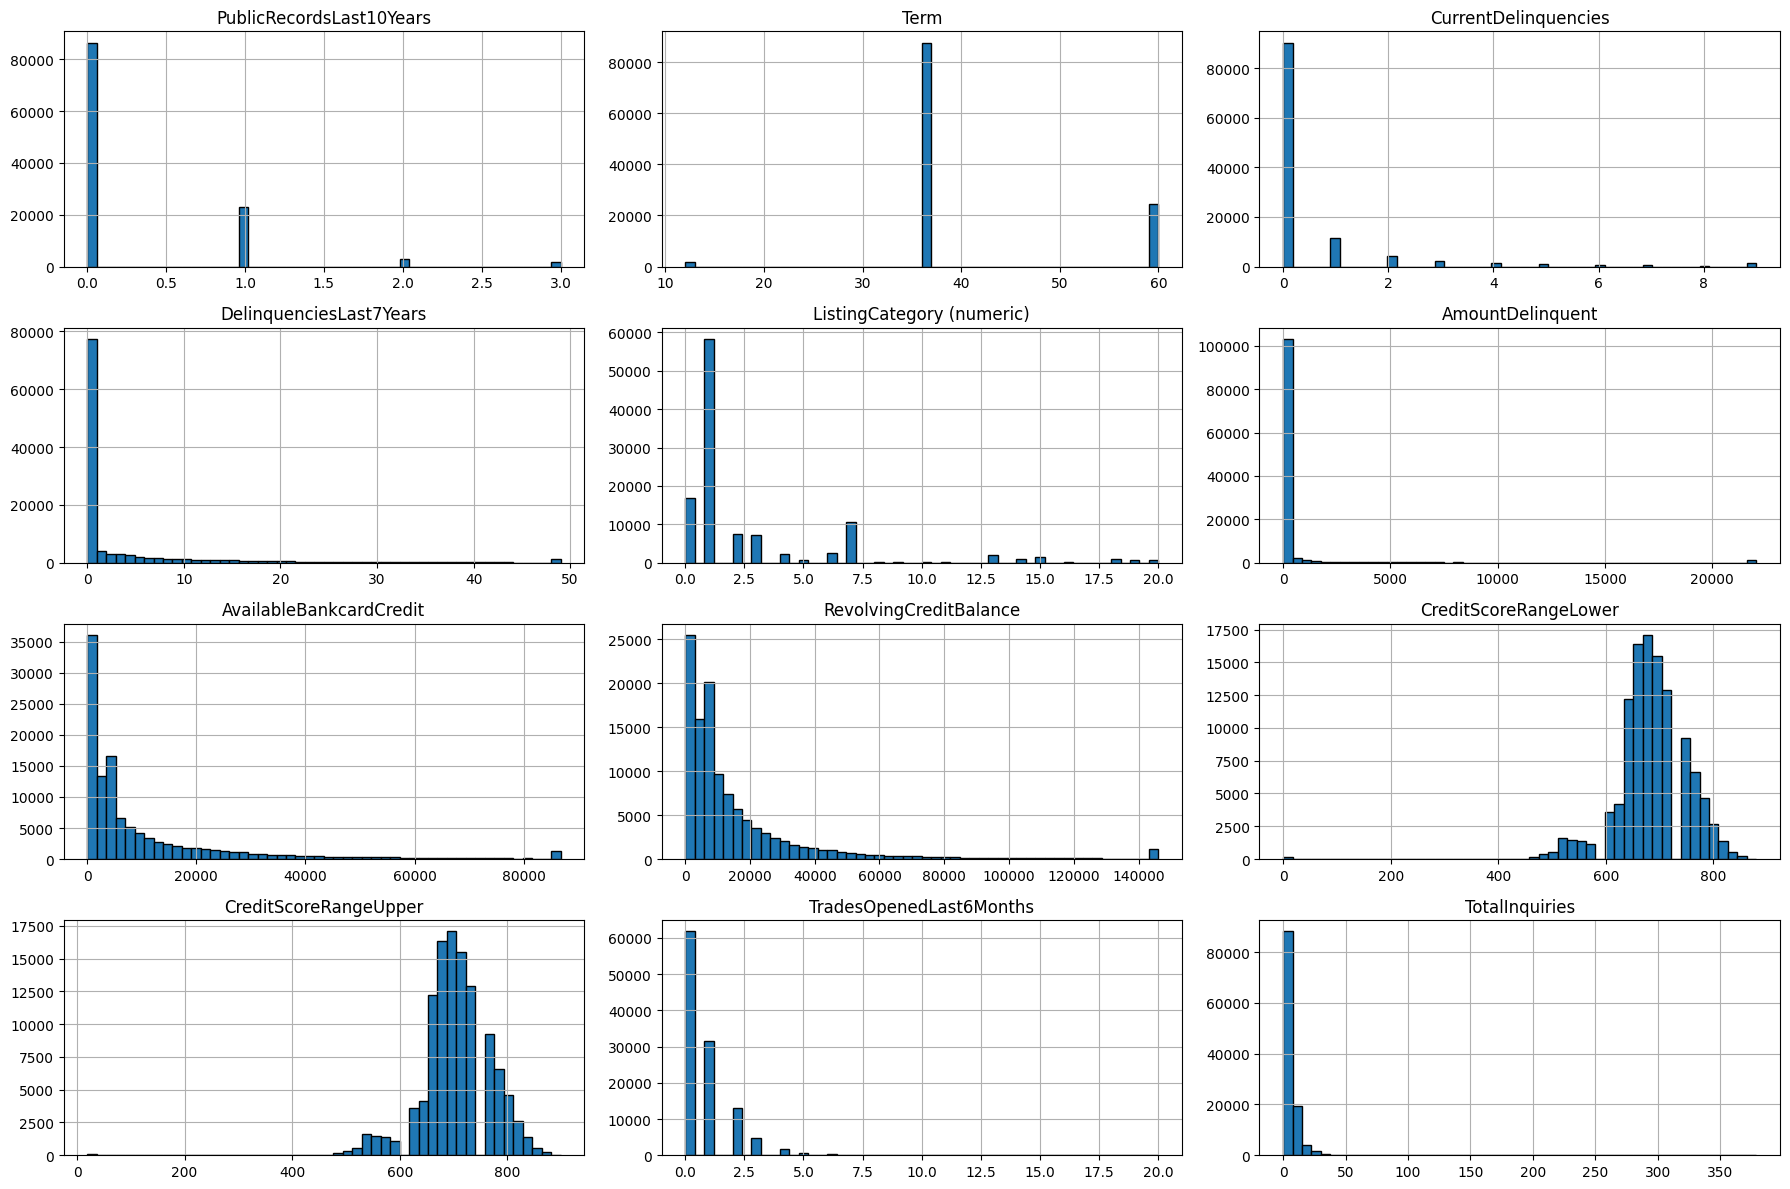

In [18]:
pp.plot_multiple_distributions(df, top_outlier_cols, bins=50, n_cols=3, figsize=(18, 12))



| Variable                  | Decision | Justification |
|---------------------------|----------|---------------|
| AvailableBankcardCredit   | Keep     | Right-skewed but expected for financial variables. Reflects available credit, important for risk assessment. |
| RevolvingCreditBalance    | Keep     | Skewness reflects typical borrower profiles. Provides crucial information on credit utilization. |
| CreditScoreRangeLower     | Keep     | Near-normal distribution. Essential predictor of borrower creditworthiness. |
| CreditScoreRangeUpper     | Keep     | Same as above. Retains important credit score information. |
| TradesOpenedLast6Months   | Keep     | Although skewed, it indicates recent borrower credit activity. Relevant for predicting financial behavior. |
| TotalInquiries            | Keep     | Captures borrower credit-seeking behavior. Outliers may be predictive of increased default risk. |


## 4. Categorical Variables Analysis and Preparation

In this section, we identify the categorical variables, including those numeric variables that behave as categorical. We will also determine which variables have an inherent order and should be treated with ordinal encoding, and which will be encoded using one-hot encoding.

In [19]:
# Get current categorical variables
num_cols, cat_cols = pp.get_numerical_and_categorical_columns(df)

print("Categorical columns identified:")
display(cat_cols)

Categorical columns identified:


['ListingCreationDate',
 'LoanStatus',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'LoanOriginationDate',
 'LoanOriginationQuarter']

Some numerical variables, despite being stored as numbers, represent categories or discrete groups. These will be recast as categorical variables for appropriate encoding.

In [20]:
# Numeric variables that should be treated as categorical
numeric_categoricals = ['ListingCategory (numeric)', 'Term']

# Convert them to category type
for col in numeric_categoricals:
    df[col] = df[col].astype('category')

print("Converted numeric variables to categorical:")
display(numeric_categoricals)

Converted numeric variables to categorical:


['ListingCategory (numeric)', 'Term']

### Encoding strategy

Before encoding the categorical variables, we first examined the dataset to distinguish between:

- Variables with a **natural order** suitable for ordinal encoding.
- Nominal variables appropriate for **one-hot encoding**.
- **Date variables**, which were transformed into numeric features (year and month) to preserve temporal information.

#### Date variables transformation

The following date variables were decomposed into their year and month components and then removed from the dataset:

- `ListingCreationDate`
- `DateCreditPulled`
- `FirstRecordedCreditLine`
- `LoanOriginationDate`

This approach preserves the temporal structure of the data while converting dates into numeric features suitable for machine learning models.

#### Encoding assignment

- **Ordinal variables**:
    - `ProsperRating (Alpha)`: Represents credit risk ratings from "HR" (High Risk) to "AA" (Low Risk).
    - `IncomeRange`: Represents income brackets in ascending order.
    - `Term`: Loan term in months (12, 36, 60), which has a natural order.

- **One-hot variables**:
    All remaining categorical variables without an intrinsic order, such as state, occupation, and loan status.

This encoding strategy ensures that the machine learning algorithms can effectively process the categorical information without introducing artificial relationships or bias.


In [21]:
date_vars = ['ListingCreationDate', 'DateCreditPulled', 
             'FirstRecordedCreditLine', 'LoanOriginationDate']

df = pp.extract_date_features(df, date_vars)

In [22]:
df['ListingCreationDate_year']

0         2007.0
1         2014.0
2         2007.0
3         2012.0
4         2013.0
           ...  
113932    2013.0
113933    2011.0
113934    2013.0
113935    2011.0
113936    2014.0
Name: ListingCreationDate_year, Length: 113937, dtype: float64

We now identify which categorical variables have a natural order (ordinal) and which do not. Ordinal variables will be encoded preserving their order.

In [23]:
# Variables with natural order
ordinal_vars = ['ProsperRating (Alpha)', 'IncomeRange', 'Term']

# Update list of categoricals
num_cols, cat_cols = pp.get_numerical_and_categorical_columns(df)
# Remove LoanStatus as it will be used as target
cat_cols = [col for col in cat_cols if col != 'LoanStatus']

# One-hot variables = all categoricals minus the ordinal ones
onehot_vars = [col for col in cat_cols if col not in ordinal_vars]

print("Ordinal variables:", ordinal_vars)
print("One-hot variables:", onehot_vars)

Ordinal variables: ['ProsperRating (Alpha)', 'IncomeRange', 'Term']
One-hot variables: ['ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'LoanOriginationQuarter']


In [24]:
df = pp.encode_mixed_categoricals(df, ordinal_vars, onehot_vars)

In [25]:
num_cols, cat_cols = pp.get_numerical_and_categorical_columns(df)

if not cat_cols:
    print("All categorical variables have been encoded. The dataset is now fully numeric.")
else:
    print(f"Categorical variables still remaining: {cat_cols}")

Categorical variables still remaining: ['LoanStatus']


## 5. Target Variable Definition
### Analysis of LoanStatus variable

Before defining the TARGET variable, we examine the distinct values of the `LoanStatus` column to understand the possible loan outcomes. This will allow us to clearly define which statuses correspond to default events.

We will consider statuses like "Chargedoff" and "Defaulted" as positive cases (default = 1) for the TARGET variable.

In [26]:
df['LoanStatus'].value_counts()

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

### Defining the TARGET variable

The `LoanStatus` column includes multiple statuses reflecting the repayment state of the loans. To create a binary classification target (`default` vs `no default`), we will consider:

- **Default (1):** Loans with status "Chargedoff" or "Defaulted".
- **No default (0):** All other statuses, including "Current", "Completed", and various levels of past due.

This approach simplifies the problem to predicting whether a loan will eventually default.

In [27]:
default_statuses = ['Chargedoff', 'Defaulted']

df['TARGET'] = df['LoanStatus'].apply(lambda x: 1 if x in default_statuses else 0)

print("Default rate in the dataset:", df['TARGET'].mean())

Default rate in the dataset: 0.14929303035888253


### TARGET variable distribution

After defining the binary TARGET variable, we explore its distribution to understand the class balance. This is crucial for later modeling steps, as imbalanced classes may require resampling techniques or adjusted evaluation metrics.

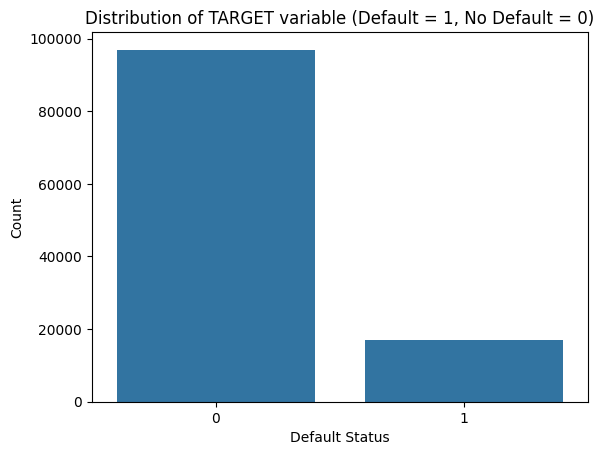

Percentage of defaults in the dataset: 14.93%


In [28]:
# Drop LoanStatus since it's now encoded in TARGET
df.drop(columns=['LoanStatus'], inplace=True)

# Check target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TARGET', data=df)
plt.title('Distribution of TARGET variable (Default = 1, No Default = 0)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

# Print percentage of defaults
default_percentage = df['TARGET'].mean() * 100
print(f"Percentage of defaults in the dataset: {default_percentage:.2f}%")

## 6. Feature scaling

In [29]:
# Revisar estadísticas de las numéricas
num_cols, _ = pp.get_numerical_and_categorical_columns(df)

df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
ListingNumber,113937.0,627885.692506,328076.236386,4.00000,400919.000000,600554.000000,892634.0000,1.255725e+06
Term,113937.0,1.201260,0.434842,0.00000,1.000000,1.000000,1.0000,2.000000e+00
BorrowerAPR,113937.0,0.218826,0.080355,0.00653,0.156290,0.209760,0.2837,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.2500,4.975000e-01
LenderYield,113937.0,0.182701,0.074516,-0.01000,0.124200,0.173000,0.2400,4.925000e-01
EstimatedEffectiveYield,113937.0,0.166833,0.059168,-0.18270,0.132600,0.161500,0.1952,3.199000e-01
EstimatedLoss,113937.0,0.078288,0.040503,0.00490,0.054900,0.072400,0.0975,3.660000e-01
EstimatedReturn,113937.0,0.094953,0.026306,-0.18270,0.080220,0.091700,0.1087,2.837000e-01
ProsperRating (numeric),113937.0,4.053802,1.444304,1.00000,3.000000,4.000000,5.0000,7.000000e+00
ProsperRating (Alpha),113937.0,3.886692,2.406190,0.00000,2.000000,4.000000,7.0000,7.000000e+00


We applied standard scaling to all numerical features to ensure comparability and improve model performance. 
The target variable (`TARGET`) was excluded from scaling to preserve its binary classification nature (0 = non-default, 1 = default).

In [30]:
# Scale all numerical features, exclude TARGET from scaling
df_scaled = pp.scale_features(df, target_column='TARGET')

# Check that TARGET remains unchanged
print("Unique values in TARGET after scaling:", df_scaled['TARGET'].unique())


Unique values in TARGET after scaling: [0 1]


In [32]:
# Check that mean ~ 0 and std ~ 1 for numerical variables (excluding TARGET)
num_cols, _ = pp.get_numerical_and_categorical_columns(df_scaled)
num_cols = [col for col in num_cols if col != 'TARGET']

df_scaled[num_cols].agg(['mean', 'std'])

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Investors,ListingCreationDate_year,ListingCreationDate_month,DateCreditPulled_year,DateCreditPulled_month,FirstRecordedCreditLine_year,FirstRecordedCreditLine_month,LoanOriginationDate_year,LoanOriginationDate_month
mean,1.482987e-16,9.778483e-17,7.982435e-17,2.989671e-16,-1.334563e-17,-7.236264e-16,-2.984682e-16,-4.515065e-17,-1.566553e-16,5.188583e-17,1.345165e-16,1.521652e-17,2.606764e-16,2.606764e-16,2.762671e-17,-1.759877e-16,-2.354195e-17,2.606764e-17,3.280282e-17,-4.926659e-17,1.521652e-17,-2.163988e-17,1.247255e-19,4.646027e-18,1.184893e-17,1.193468e-17,3.405007e-17,-2.231340e-16,4.851824e-17,-9.872027e-17,2.049241e-15,2.594291e-17,-4.708389e-17,-7.234082e-18,9.167328e-17,5.026440e-17,1.920773e-17,-4.939132e-17,2.596162e-16,-7.516554e-15,7.257468e-17,-3.475433e-14,-5.031056e-17,9.495013e-14,-4.704152e-17,5.198432e-15,9.587684e-17,3.722970e-14,1.371981e-18
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000017e+00,1.000017e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00


## Saving of processed data and Train/Test split

In [37]:
# Save full preprocessed dataset
pp.save_processed_data(df_scaled, '../data/processed/prosperloan/prosper_loan_data_preprocessed.csv')

# Features and target
X = df_scaled.drop('TARGET', axis=1)
y = df_scaled['TARGET']

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Save splits
X_train.to_csv('../data/processed/prosperloan/X_train.csv', index=False)
X_test.to_csv('../data/processed/prosperloan/X_test.csv', index=False)
y_train.to_csv('../data/processed/prosperloan/y_train.csv', index=False)
y_test.to_csv('../data/processed/prosperloan/y_test.csv', index=False)

print("Data saved and split completed.")


Data saved and split completed.
